# Importing Libraries

In [12]:
import pandas as pd
import re 

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vatsalnanda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Reading the dataset

In [15]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=["label","message"])

In [16]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
df.isnull().sum()

label      0
message    0
dtype: int64

# Cleaning the data

In [22]:
ps = PorterStemmer()
corpus = []

In [23]:
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['message'][i]) #retain only a-z and A-Z characters and replace all others with a space
    review=review.lower() #convert to lowercase
    review=review.split() #list of words
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #List comprehension
    review=' '.join(review)
    corpus.append(review)
    

In [24]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

# Creating Bag of Words Model 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [26]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
Y=pd.get_dummies(df['label']) #Output label
Y=Y.iloc[:,1].values

In [28]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# ML Model-Linear SVM

In [31]:
LSC = LinearSVC()

In [32]:
LSC.fit(X_train, Y_train)
x11=LSC.score(X_train, Y_train)
x12=LSC.score(X_test, Y_test)

# ML Model-Gaussian Naive Bayes

In [33]:
gnb = GaussianNB()

In [34]:
gnb.fit(X_train, Y_train)
x21=gnb.score(X_train, Y_train) 
x22=gnb.score(X_test, Y_test)

# ML Model-Logistic Regression

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(X_train, Y_train)
x31=lr.score(X_train, Y_train) 
x32=lr.score(X_test, Y_test)

# ML Model-Random Forest Classifier

In [37]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)

In [38]:
rfc.fit(X_train, Y_train)
x41=rfc.score(X_train, Y_train) 
x42=rfc.score(X_test, Y_test)

# Plotting the results

In [39]:
data1 = {'SVM':x11, 'Gaussian Naive Bayes':x21, 'Logistic Regression':x31,'Random Forest Classifier':x41}

In [40]:
algos = list(data1.keys())
train_accuracy = list(data1.values())

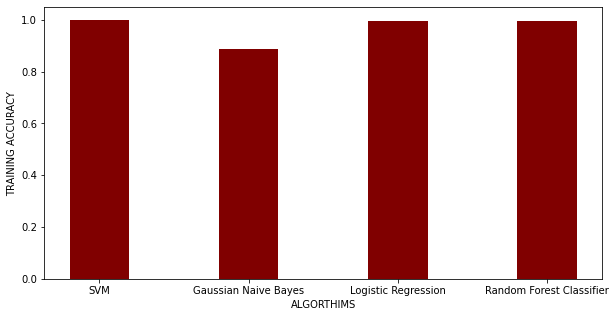

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 

plt.bar(algos, train_accuracy, color ='maroon',width = 0.4)
 
plt.xlabel("ALGORTHIMS")
plt.ylabel("TRAINING ACCURACY")
plt.show()

In [42]:
data2 = {'SVM':x12, 'Gaussian Naive Bayes':x22, 'Logistic Regression':x32,'Random Forest Classifier':x42}

In [43]:
algos = list(data2.keys())
test_accuracy = list(data2.values())

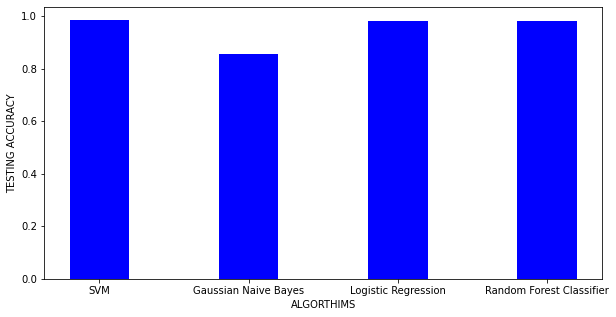

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 

plt.bar(algos, test_accuracy, color ='blue',width = 0.4)
 
plt.xlabel("ALGORTHIMS")
plt.ylabel("TESTING ACCURACY")
plt.show()